# Project Proposal for Lobbysts4America: Analyzing COngressional Tweets (2008-2017) for Lobbying Insights

## Description:

The project aims to analyze congressional tweets from 2008 to 2017 to gain insights into key topics, influential members, and relationships within Congress. The findings will be of interest to Lobbyists4America, a company seeking to strengthen their lobbying efforts by understanding legislative trends and member engagement on Twitter. The audience for this project includes lobbyists, policymakers, and individuals interested in understanding the dynamics of congressional discussions on social media.

## Questions:

1. What are the most discussed topics in congressional tweets during the specified period?
2. Which members of Congress are the most active on Twitter and engage with legislative topics?
3. Are there any significant connections or relationships between members based on their interactions on Twitter?

## Hypotheses:

1. Congressional tweets will cover a wide range of topics, including healthcare, economy, defense, and immigration.
2. Influential members of Congress, committee chairs, and leaders are expected to be more active on Twitter and have higher engagement with tweets related to legislation.
3. Social network analysis might reveal clusters of members who frequently interact or retweet each other, indicating potential alliances or affiliations.

## Approach:
The initial approach involves data collection, importation, and cleaning. We will then perform initial exploration to understand data distributions and patterns. Key features to be analyzed include tweet text, timestamp, user mentions, and retweet counts. We will apply natural language processing techniques to extract topics from the tweet text and identify frequent co-occurrences among members.

For the analysis, we will conduct social network analysis to uncover relationships and connections between members based on interactions. Additionally, sentiment analysis will be used to gauge the tone of congressional tweets over time. The primary evaluation metric will be the identification of significant topics, highly engaged members, and clusters of interconnected members.

In [2]:
import pandas as pd

# Import files
tweets_data = pd.read_json("tweets.json", lines=True)
users_data = pd.read_json("users.json", lines = True)

In [239]:
pd.set_option('display.max_colwidth', None)
tweets_data.head()

contributors coordinates          created_at display_text_range  \
0           NaN        None 2008-08-04 17:28:51            [0, 74]   
1           NaN        None 2008-08-06 19:04:45            [0, 25]   
2           NaN        None 2008-08-06 20:35:36            [0, 65]   
3           NaN        None 2008-08-07 13:52:52            [0, 37]   
4           NaN        None 2008-08-07 15:12:05            [0, 90]   

                                                           entities  \
0  {'hashtags': [], 'symbols': [], 'urls': [], 'user_mentions': []}   
1  {'hashtags': [], 'symbols': [], 'urls': [], 'user_mentions': []}   
2  {'hashtags': [], 'symbols': [], 'urls': [], 'user_mentions': []}   
3  {'hashtags': [], 'symbols': [], 'urls': [], 'user_mentions': []}   
4  {'hashtags': [], 'symbols': [], 'urls': [], 'user_mentions': []}   

   favorite_count  favorited   geo         id     id_str  ...  \
0               0      False  None  877418565  877418565  ...   
1               0      False  None  879618172  879618172  ...   
2               0      False  None  879695803  879695803  ...   
3               0      False  None  880393665  880393665  ...   
4               0      False  None  880474266  880474266  ...   

                                                                                         text  \
0                  On a conference call about a weekend trip to Iraq to visit Arkansas troops   
1                                                                   Being interviewed by KTHV   
2                           Being interviewed by KARN on his Arkansas World Trade Center trip   
3                                                       On KWHN in Fort Smith, that's 1320 AM   
4  Attending a Military of the Purple Heart Ceremony at the VA Medical Center in Fayetteville   

   truncated  user_id  possibly_sensitive  extended_entities  \
0      False  5558312                 NaN                NaN   
1      False  5558312                 NaN                NaN   
2      False  5558312                 NaN                NaN   
3      False  5558312                 NaN                NaN   
4      False  5558312                 NaN                NaN   

   quoted_status_id quoted_status_id_str withheld_copyright  \
0               NaN                  NaN                NaN   
1               NaN                  NaN                NaN   
2               NaN                  NaN                NaN   
3               NaN                  NaN                NaN   
4               NaN                  NaN                NaN   

   withheld_in_countries  withheld_scope  
0                    NaN             NaN  
1                    NaN             NaN  
2                    NaN             NaN  
3                    NaN             NaN  
4                    NaN             NaN  

[5 rows x 32 columns]

In [240]:
users_data.head()

contributors_enabled                          created_at  default_profile  \
0                 False 1970-01-01 00:00:01.417384037+00:00             True   
1                 False 1970-01-01 00:00:01.240239576+00:00            False   
2                 False 1970-01-01 00:00:01.366837593+00:00            False   
3                 False 1970-01-01 00:00:01.300739574+00:00            False   
4                 False 1970-01-01 00:00:01.294329706+00:00            False   

   default_profile_image  \
0                  False   
1                  False   
2                  False   
3                  False   
4                  False   

                                                                                                                                                       description  \
0  Official Twitter page of Alaska Governor Bill Walker; honored to serve AK w/ @LtGovMallott. RTs ≠ endorsements.Tweets signed "-BW" come directly from Governor.   
1                                                                                            U.S. Senator from Minnesota. Follows, Retweets, Replies ≠ endorsement   
2                                                                   Congressman for Maryland's 4th Congressional District, former Army Aviator, father and husband   
3            Husband of 43 yrs, Dad of 4, Papaw of 6. Lifelong Arkansan. Governor of Arkansas. Former Congressman, Admin. of DEA, Under Sec. of Homeland Security.   
4                                                                                               I am proud to represent the 8th Congressional District of Georgia.   

                                                                                                                                                                                               entities  \
0                     {'description': {'urls': []}, 'url': {'urls': [{'display_url': 'gov.alaska.gov', 'expanded_url': 'http://gov.alaska.gov', 'indices': [0, 22], 'url': 'http://t.co/NO67LyZvUR'}]}}   
1             {'description': {'urls': []}, 'url': {'urls': [{'display_url': 'amyklobuchar.com', 'expanded_url': 'http://www.amyklobuchar.com', 'indices': [0, 22], 'url': 'http://t.co/mGGFBfggto'}]}}   
2            {'description': {'urls': []}, 'url': {'urls': [{'display_url': 'anthonybrown.com', 'expanded_url': 'http://www.anthonybrown.com', 'indices': [0, 23], 'url': 'https://t.co/NYPWOVmoAx'}]}}   
3  {'description': {'urls': []}, 'url': {'urls': [{'display_url': 'governor.arkansas.gov', 'expanded_url': 'http://www.governor.arkansas.gov', 'indices': [0, 23], 'url': 'https://t.co/b38CUNlZHi'}]}}   
4       {'description': {'urls': []}, 'url': {'urls': [{'display_url': 'austinscott.house.gov', 'expanded_url': 'http://austinscott.house.gov', 'indices': [0, 22], 'url': 'http://t.co/GQwXIhub9a'}]}}   

   favourites_count  follow_request_sent  followers_count  following  ...  \
0               115                False             5870      False  ...   
1                24                False           170717      False  ...   
2                90                False             6067      False  ...   
3               440                False            25747      False  ...   
4                12                False            13048      False  ...   

   profile_text_color  profile_use_background_image  protected  \
0              333333                          True      False   
1              3D3C3D                          True      False   
2              333333                         False      False   
3              333333                         False      False   
4              11172E                          True      False   

       screen_name  statuses_count                   time_zone  \
0  AkGovBillWalker            1642                        None   
1     amyklobuchar            5567  Central Time (US & Canada)   
2  AnthonyBrownMD4            1878  Eastern Time (US & Canada)   
3    AsaHutch

In [241]:
tweets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243370 entries, 0 to 1243369
Data columns (total 32 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   contributors               0 non-null        float64       
 1   coordinates                2734 non-null     object        
 2   created_at                 1243370 non-null  datetime64[ns]
 3   display_text_range         1243370 non-null  object        
 4   entities                   1243370 non-null  object        
 5   favorite_count             1243370 non-null  int64         
 6   favorited                  1243370 non-null  bool          
 7   geo                        2734 non-null     object        
 8   id                         1243370 non-null  int64         
 9   id_str                     1243370 non-null  int64         
 10  in_reply_to_screen_name    65411 non-null    object        
 11  in_reply_to_status_id      54146 non-

In [242]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 42 columns):
 #   Column                              Non-Null Count  Dtype              
---  ------                              --------------  -----              
 0   contributors_enabled                548 non-null    bool               
 1   created_at                          548 non-null    datetime64[ns, UTC]
 2   default_profile                     548 non-null    bool               
 3   default_profile_image               548 non-null    bool               
 4   description                         548 non-null    object             
 5   entities                            545 non-null    object             
 6   favourites_count                    548 non-null    int64              
 7   follow_request_sent                 548 non-null    bool               
 8   followers_count                     548 non-null    int64              
 9   following                           548 non

### Select only relevant columns to work with

In [243]:
tweets_df = tweets_data[['id', 'created_at', 'favorite_count', 'retweet_count', 'screen_name','text', 'user_id', 'entities']]
users_df = users_data[['id', 'created_at', 'description', 'favourites_count', 'followers_count', 'friends_count', 'listed_count' ,'name', 'screen_name', 'statuses_count', 'location']]

In [244]:
### Check for any duplicates users
users_df['id'].nunique()

548

#### Perform some EDA

In [245]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
users_df.describe()

id  favourites_count  followers_count  \
count                548.000           548.000          548.000   
mean   72363033893011936.000           413.912       163433.909   
std   231221286494740288.000           965.151      1597357.021   
min              5558312.000             0.000            4.000   
25%             57688816.000            32.750         8960.250   
50%            247051870.500           120.500        16732.000   
75%           1212627050.250           379.750        33081.000   
max   854715071116849152.000         12507.000     31712585.000   

       friends_count  listed_count  statuses_count  
count        548.000       548.000         548.000  
mean        2033.732      1340.648        3658.960  
std         6278.436      3567.588        4259.273  
min            0.000         0.000           0.000  
25%          368.000       426.750        1387.500  
50%          751.500       750.000        2684.000  
75%         1670.500      1257.000        4509.250  
max        92934.000     70660.000       59535.000

In [246]:
print("Min created user:", users_df['created_at'].min())
print("Max created user:", users_df['created_at'].max())

Min created user: 1970-01-01 00:00:01.177689952+00:00
Max created user: 2016-10-23 18:23:37+00:00


<Axes: >

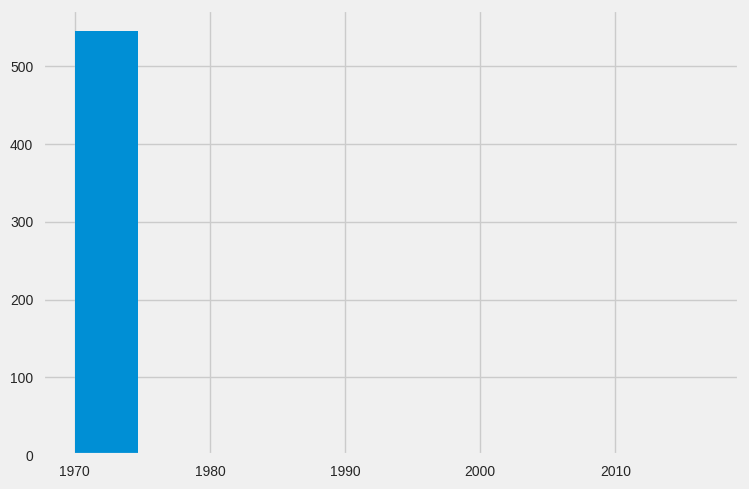

In [247]:
### Seems it looks weird that the oldest account created is 1970
users_df['created_at'].hist()

The created_at column wont be neccessary for our analysis but it is important to point out that the majority of users appears
to be created in 1970 which looks like an bug from twitter API side.

In [248]:
users_df = users_df.drop(columns=['created_at'])

In [249]:
tweets_df.describe()

id                     created_at  favorite_count  \
count            1243370.000                        1243370     1243370.000   
mean  609659588380898944.000  2015-06-08 21:36:57.326325248         200.852   
min            877418565.000            2008-08-04 17:28:51           0.000   
25%   476795186032589824.000            2014-06-11 18:36:45           0.000   
50%   662381754246868992.000            2015-11-05 21:31:31           2.000   
75%   781241570795330560.000  2016-09-28 21:17:59.750000128           8.000   
max   872140026737336320.000            2017-06-06 17:16:00      984832.000   
std   214092515324098304.000                            NaN        3545.405   

       retweet_count                user_id  
count    1243370.000            1243370.000  
mean         190.063  13974047938548068.000  
min            0.000            5558312.000  
25%            1.000           33750798.000  
50%            4.000          234022257.000  
75%           10.000          993153006.000  
max      3637896.000 854715071116849152.000  
std         9944.392 105338269101701552.000

In [250]:
### Check min, max and distribution of tweets using the created at column
print("Min created tweet:", tweets_df['created_at'].min())
print("Max created tweet:", tweets_df['created_at'].max())

Min created tweet: 2008-08-04 17:28:51
Max created tweet: 2017-06-06 17:16:00


In [1]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-pastel')
plt.figure(figsize=(20, 10))
tweets_df.created_at.hist()

NameError: name 'tweets_df' is not defined

<Figure size 2000x1000 with 0 Axes>

In [95]:
users_df = users_df.rename(columns={"id": "user_id"})

In [56]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   user_id           548 non-null    int64              
 1   created_at        548 non-null    datetime64[ns, UTC]
 2   description       548 non-null    object             
 3   entities          545 non-null    object             
 4   favourites_count  548 non-null    int64              
 5   followers_count   548 non-null    int64              
 6   name              548 non-null    object             
 7   screen_name       548 non-null    object             
 8   statuses_count    548 non-null    int64              
 9   location          548 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(4), object(5)
memory usage: 42.9+ KB


In [100]:
tweets_df = tweets_df.rename(columns={"id": "tweet_id"})

In [189]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243370 entries, 0 to 1243369
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   tweet_id        1243370 non-null  int64         
 1   created_at      1243370 non-null  datetime64[ns]
 2   favorite_count  1243370 non-null  int64         
 3   retweet_count   1243370 non-null  int64         
 4   screen_name     1243370 non-null  object        
 5   text            1243370 non-null  object        
 6   user_id         1243370 non-null  int64         
 7   entities        1243370 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 75.9+ MB


Public Tweets (.@)
RT's (starts with RT)
Mentions (has an @ symbol)

##### Move the data frames to our database

In [34]:
import sqlite3

# Connect to the SQLite database (or create one if it doesn't exist)
conn = sqlite3.connect('twitter_data.db')
cursor = conn.cursor()

In [190]:


# Create the Users table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS Users (
        user_id          INTEGER PRIMARY KEY,
        name             TEXT,
        screen_name      TEXT,
        favourites_count INTEGER,
        followers_count  INTEGER,
        statuses_count   INTEGER,
        friends_count    INTEGER,
        listed_count     INTEGER,
        location         TEXT,
        description      TEXT
    )
''')


# Create the tweets table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS Tweets (
        tweet_id           INTEGER PRIMARY KEY,
        created_at         TEXT,
        favorite_count     INTEGER,
        retweet_count      INTEGER,
        text               TEXT,
        user_id            INTEGER,
        FOREIGN KEY (user_id) REFERENCES Users (user_id)
    )
''')

# Create the Hashtags table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS Hashtags (
        hashtag_id  INTEGER PRIMARY KEY,
        text        TEXT,
        count       INTEGER
    )
''')

# Create the TweetHashtags junction table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS TweetHashtags (
        tweet_id   INTEGER,
        hashtag_id INTEGER,
        PRIMARY KEY (tweet_id, hashtag_id),
        FOREIGN KEY (tweet_id)   REFERENCES Tweets (tweet_id),
        FOREIGN KEY (hashtag_id) REFERENCES Hastags (hashtag_id)
    )
''')



# Create the TweetUserMention table (junction table)
cursor.execute('''
    CREATE TABLE IF NOT EXISTS TweetUserMention (
        tweet_id INTEGER,
        user_id INTEGER,
        name    TEXT,
        screen_name TEXT,
        PRIMARY KEY (tweet_id, user_id),
        FOREIGN KEY (tweet_id) REFERENCES Tweets (tweet_id),
        FOREIGN KEY (user_id) REFERENCES Users (user_id)
    )
''')

# Commit changes and close the connection
conn.commit()

In [191]:
# Insert user_df to database
users_df.to_sql('Users', conn, if_exists='append', index=False)


548

In [192]:
col_names = ['tweet_id', 'created_at', 'favorite_count', 'retweet_count', 'text', 'user_id']
tweets_df[col_names].to_sql('Tweets', conn, if_exists='append', index=False)

1243370

In [193]:
# Extract hashtags from tweets_df entities and count the number of occurrences
hashtags = {}

for i in range(len(tweets_df['entities'])):
    if len(tweets_df['entities'][i]['hashtags']) > 0:
        for j in range(len(tweets_df['entities'][i]['hashtags'])):
            # hashtags.append(tweets_df['entities'][i]['hashtags'][j]['text'])
            text = tweets_df['entities'][i]['hashtags'][j]['text']
            hashtags[text] = hashtags.get(text, 0) + 1
        

In [194]:
# Populate Hashtags table
for key, value in hashtags.items():
    cursor.execute('INSERT INTO Hashtags (text, count) VALUES (?, ?)', (key, value))

# Commit the changes and close the connection
conn.commit()

In [195]:
for i in range(len(tweets_df['entities'])):
    if len(tweets_df['entities'][i]['user_mentions']) > 0:
        for j in range(len(tweets_df['entities'][i]['user_mentions'])):
            tweet_id = int(tweets_df['tweet_id'][i])  # Convert tweet_id to integer
            user_id = tweets_df['entities'][i]['user_mentions'][j]['id']
            name = tweets_df['entities'][i]['user_mentions'][j]['name']
            screen_name = tweets_df['entities'][i]['user_mentions'][j]['screen_name']
            cursor.execute("""
                INSERT OR IGNORE INTO TweetUserMention (tweet_id, user_id, name, screen_name) VALUES (?, ?, ? , ?)""",
                           (tweet_id, user_id, name, screen_name)
                          )
conn.commit()

#### Visualizations


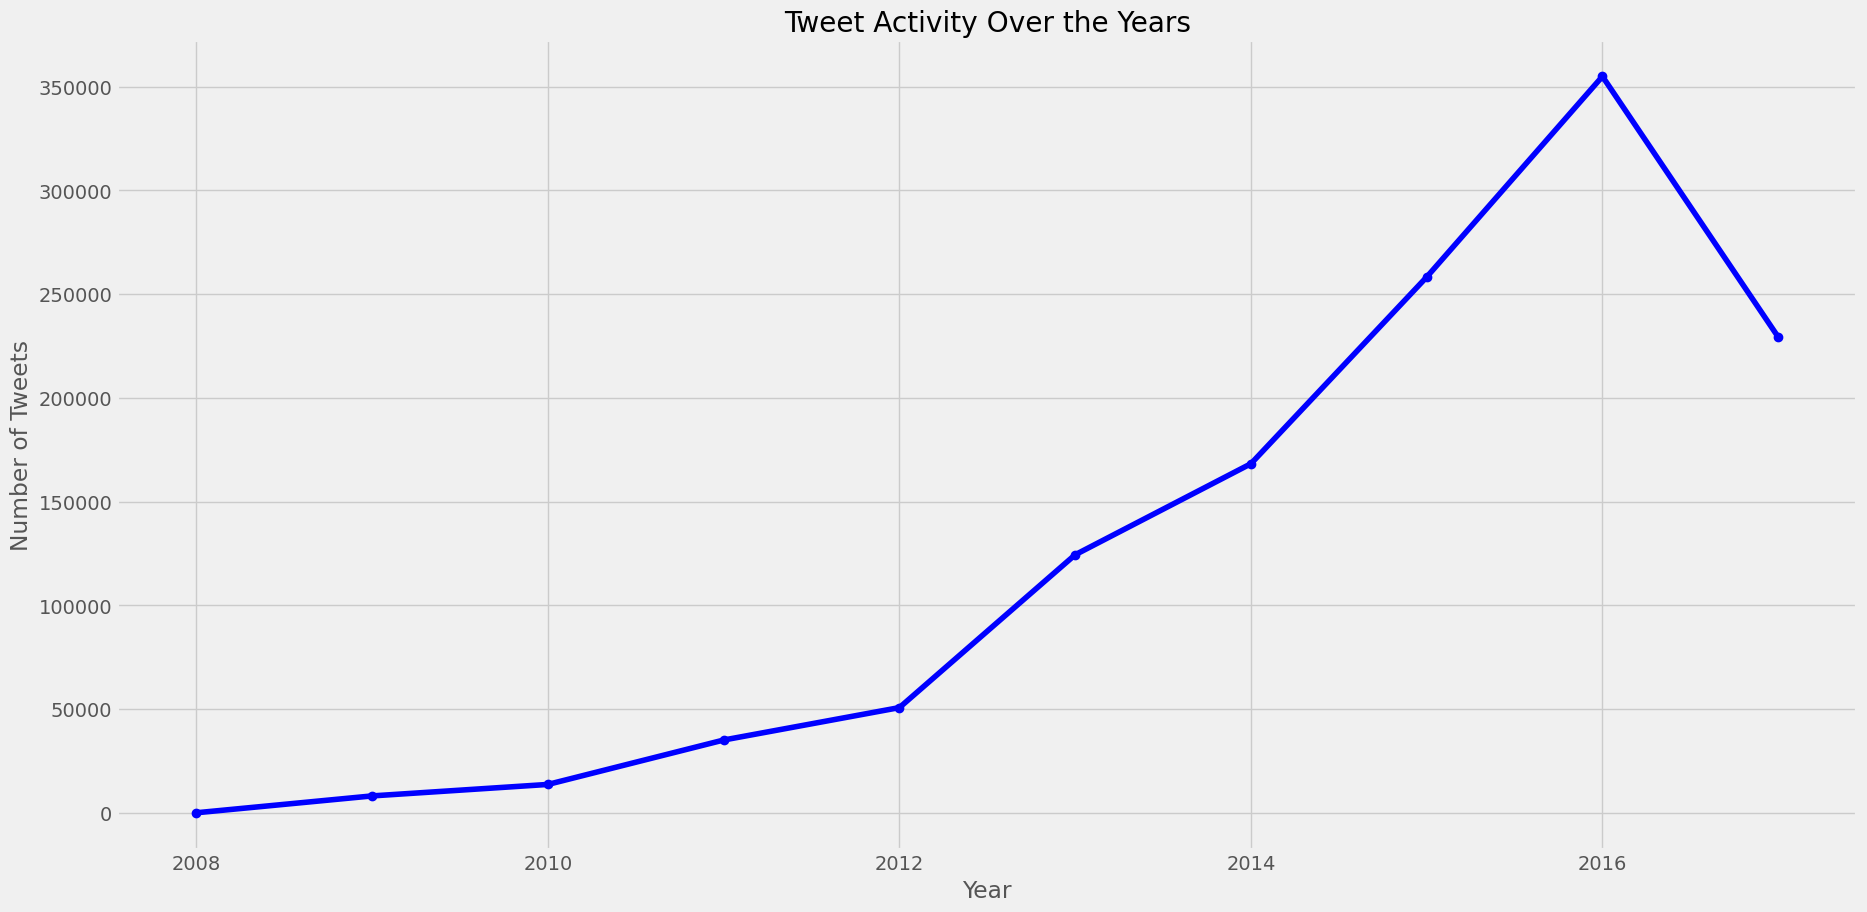

In [28]:
# Tweets Activity Over Years
import pandas as pd
import matplotlib.pyplot as plt

tweet_activity = pd.read_sql_query("SELECT created_at FROM Tweets", conn)
tweet_activity['created_at'] = pd.to_datetime(tweet_activity['created_at'])
tweet_activity = tweet_activity.groupby(tweet_activity['created_at'].dt.year).size()

plt.style.use('fivethirtyeight')
plt.figure(figsize=(20, 10))
plt.plot(tweet_activity.index, tweet_activity.values, marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Number of Tweets')
plt.title('Tweet Activity Over the Years', color='black')
plt.grid(True)
plt.show()


### What are the most discussed topics in congressional tweets during the specified period?

#### Hypotheses:
Congressional tweets will cover a wide range of topics, including healthcare, economy, defense, and immigration.

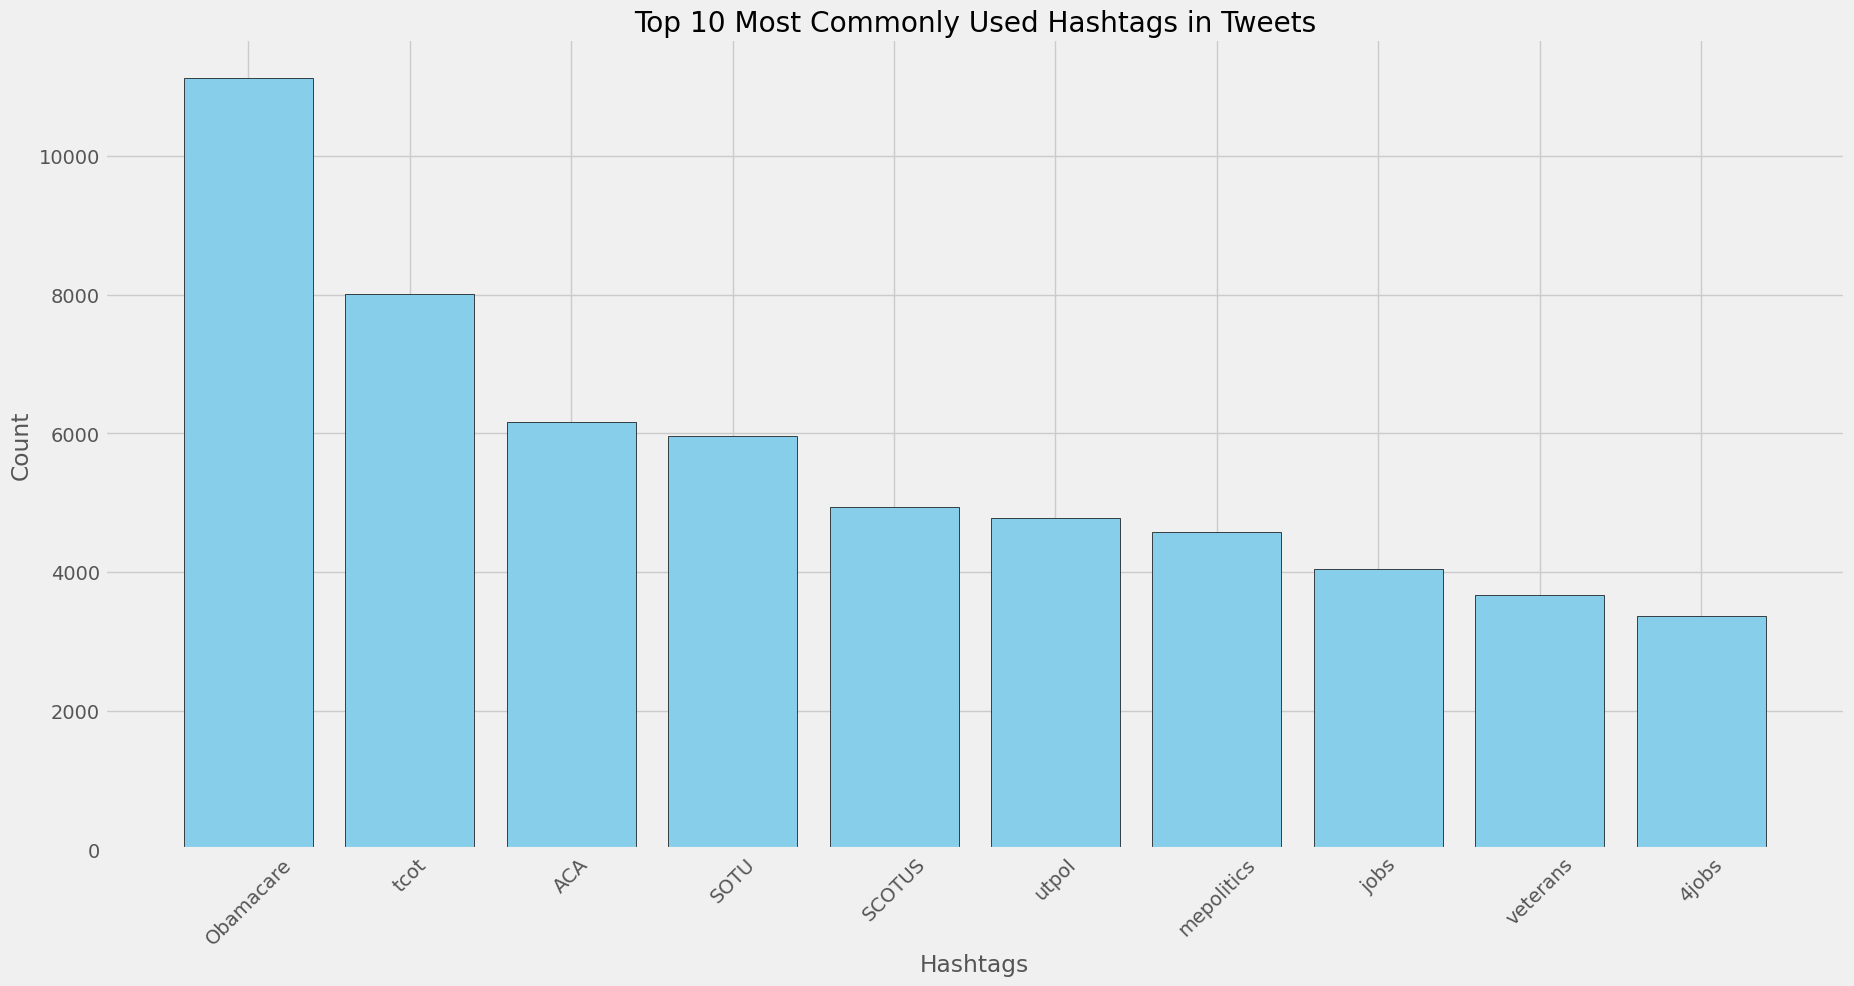

In [29]:
# Retrieve all hashtags and counts
hashtags_df = pd.read_sql_query("SELECT text, count FROM Hashtags ORDER BY count DESC", conn)
top_10_hashtags = hashtags_df.nlargest(10, 'count')

plt.figure(figsize=(20, 10))
plt.bar(top_10_hashtags['text'], top_10_hashtags['count'],color='skyblue', edgecolor='black')
plt.xlabel('Hashtags')
plt.ylabel('Count')
plt.title('Top 10 Most Commonly Used Hashtags in Tweets', color='black')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [30]:
top_10_hashtags

text  count
0   Obamacare  11124
1        tcot   8010
2         ACA   6168
3        SOTU   5967
4      SCOTUS   4934
5       utpol   4776
6  mepolitics   4584
7        jobs   4045
8    veterans   3673
9       4jobs   3359

#### Hypotheses:

Congressional tweets will cover a wide range of topics, including healthcare, economy, defense, and immigration.

1. Obamacare (Affordable Care Act) - Healthcare
2. tcot (Top Conservatives on Twitter) - General conservative topics
3. ACA (Affordable Care Act) - Healthcare
4. SOTU (State of the Union) - Politics and Government
5. SCOTUS (Supreme Court of the United States) - Law and Judiciary
6. utpol (Utah Politics) - Local politics
7. mepolitics (Maine Politics) - Local politics
8. jobs - Economy and Employment
9. veterans - Military and Veterans Affairs
10. 4jobs (For Jobs) - Economy and Employment

As we can see, the hashtags cover various topics such as healthcare, economy, defense, politics, law, and local politics. This supports the initial hypothesis that congressional tweets indeed cover a wide range of topics, including healthcare, economy, defense, and immigration. The presence of hashtags related to specific policy topics and political events also indicates that congressional discussions on Twitter encompass diverse subjects and are not limited to a particular theme.

Let's use Natural Language Processing to find what are the most common words and see if we can find themes

In [40]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist



In [88]:
tweets_text = pd.read_sql_query('SELECT text FROM Tweets', conn)

In [89]:
all_tweets_text = ' '.join(tweets_text['text'])

# Tokenize text
tokens = word_tokenize(all_tweets_text)
tokens = [token.lower() for token in tokens]
tokens = [token for token in tokens if token.isalpha()]

In [90]:
# Remove stop words and chosen words
stop_words = set(stopwords.words('english'))
chosen_words = set(["http", "https", "rt", "amp"])

# Initialize WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Filter out words
tokens = [token for token in tokens if token not in stop_words and token not in chosen_words]

# Lemmatize tokens
tokens = [lemmatizer.lemmatize(token) for token in tokens]

In [91]:
freq_dist = FreqDist(tokens)

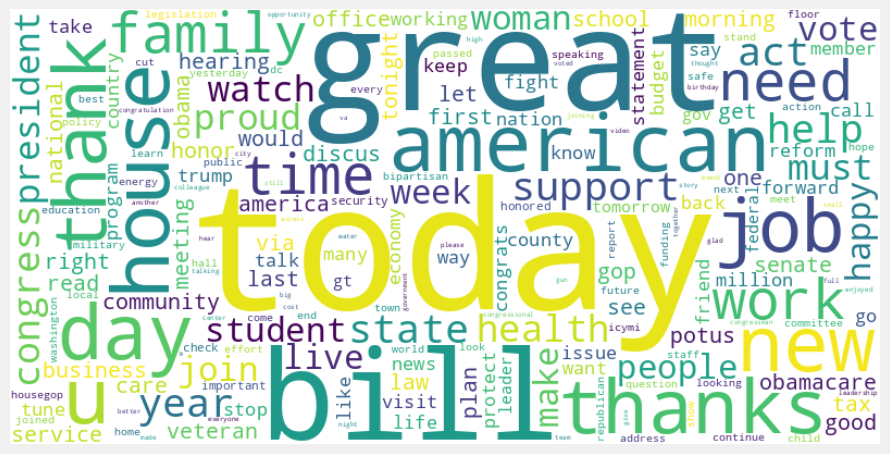

In [92]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dist)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [61]:
freq_dist.most_common(50)

[('today', 117375),
 ('great', 71653),
 ('house', 47823),
 ('bill', 47793),
 ('new', 45570),
 ('thanks', 44524),
 ('us', 43751),
 ('thank', 41743),
 ('day', 38082),
 ('work', 36189),
 ('act', 35591),
 ('time', 35448),
 ('support', 35002),
 ('help', 33733),
 ('congress', 33139),
 ('health', 31682),
 ('need', 30991),
 ('watch', 30586),
 ('must', 30021),
 ('proud', 29300),
 ('president', 29076),
 ('people', 28829),
 ('jobs', 28780),
 ('state', 28755),
 ('live', 26836),
 ('happy', 26275),
 ('week', 25721),
 ('women', 25613),
 ('americans', 25486),
 ('join', 25341),
 ('see', 25105),
 ('senate', 24545),
 ('care', 24515),
 ('american', 24466),
 ('morning', 24201),
 ('good', 24075),
 ('families', 23344),
 ('read', 23155),
 ('obamacare', 22610),
 ('vote', 22478),
 ('make', 22176),
 ('get', 22141),
 ('one', 22128),
 ('office', 22044),
 ('students', 21602),
 ('last', 21441),
 ('obama', 21169),
 ('hearing', 21168),
 ('veterans', 21161),
 ('would', 20472)]

In [93]:
freq_dist.most_common(50)

[('today', 117483),
 ('great', 71706),
 ('bill', 54041),
 ('american', 49952),
 ('house', 48063),
 ('u', 47113),
 ('new', 45570),
 ('day', 45330),
 ('thanks', 44524),
 ('job', 42184),
 ('thank', 41743),
 ('family', 39187),
 ('need', 38985),
 ('time', 38630),
 ('work', 38481),
 ('support', 37255),
 ('year', 36669),
 ('help', 36560),
 ('act', 36544),
 ('state', 36524),
 ('congress', 33157),
 ('health', 31682),
 ('watch', 30673),
 ('must', 30022),
 ('president', 29858),
 ('proud', 29300),
 ('people', 28912),
 ('woman', 28887),
 ('student', 28301),
 ('join', 27596),
 ('week', 27570),
 ('live', 26836),
 ('vote', 26424),
 ('happy', 26275),
 ('make', 26264),
 ('community', 25650),
 ('see', 25411),
 ('veteran', 24981),
 ('right', 24779),
 ('care', 24776),
 ('senate', 24548),
 ('one', 24458),
 ('good', 24444),
 ('get', 24420),
 ('morning', 24290),
 ('service', 23833),
 ('office', 23641),
 ('read', 23290),
 ('obamacare', 22610),
 ('hearing', 22516)]

In [80]:
# Get the date and tweet text from database to frequency of words by year

twt_text_year = pd.read_sql_query('SELECT text, created_at', conn)
group_tweets = twt_text_year.groupby(twt_text_year['created_at'].dt.year)

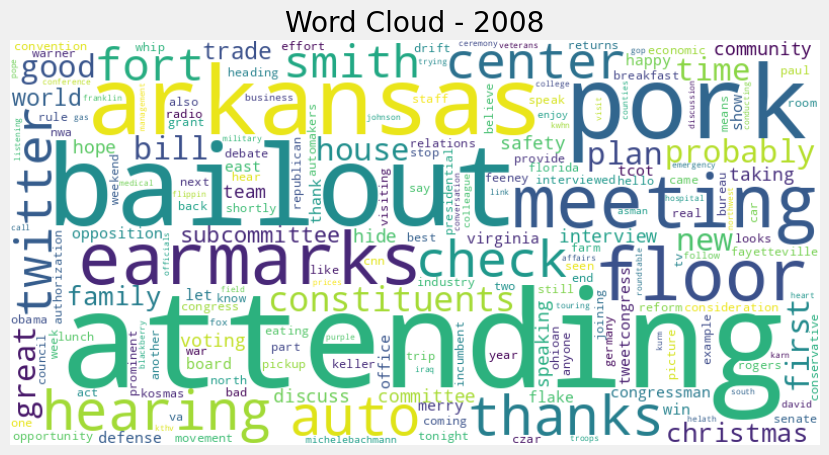

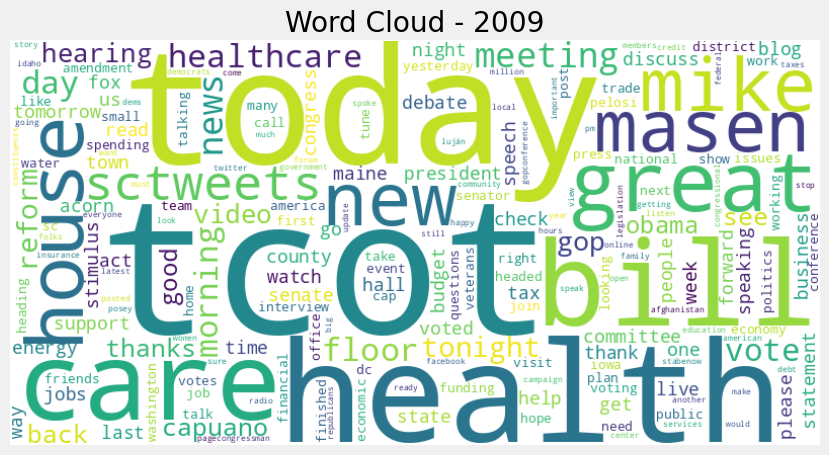

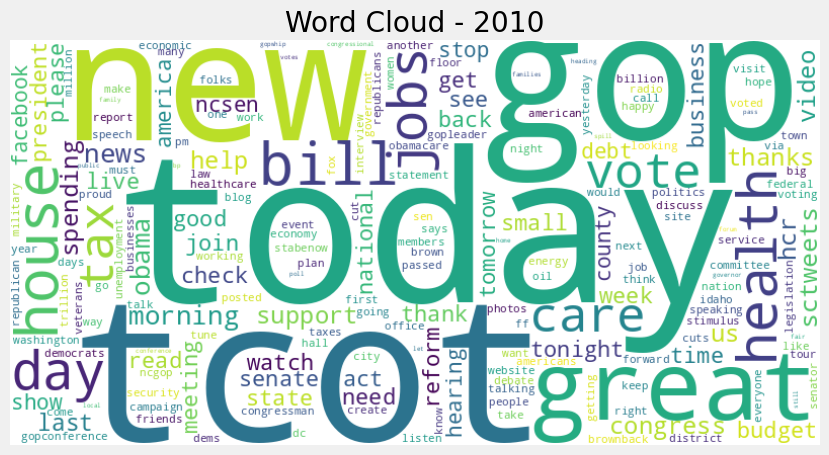

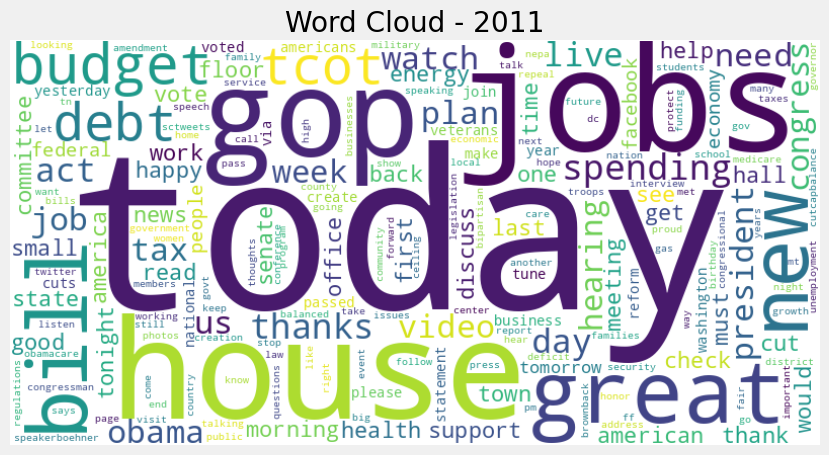

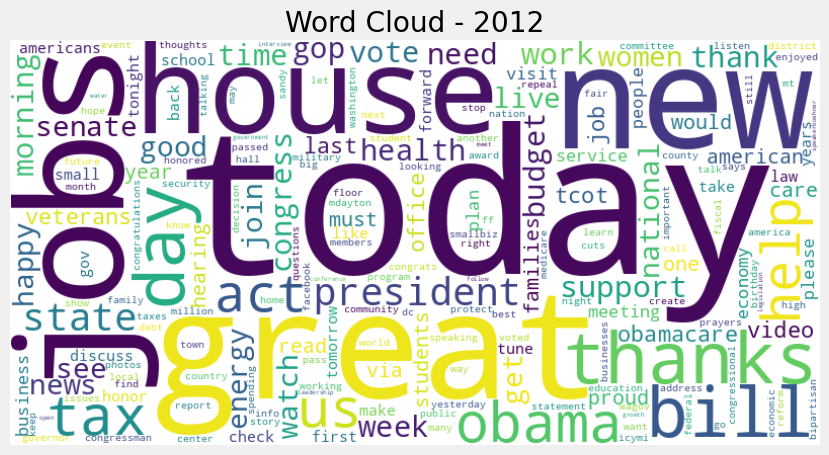

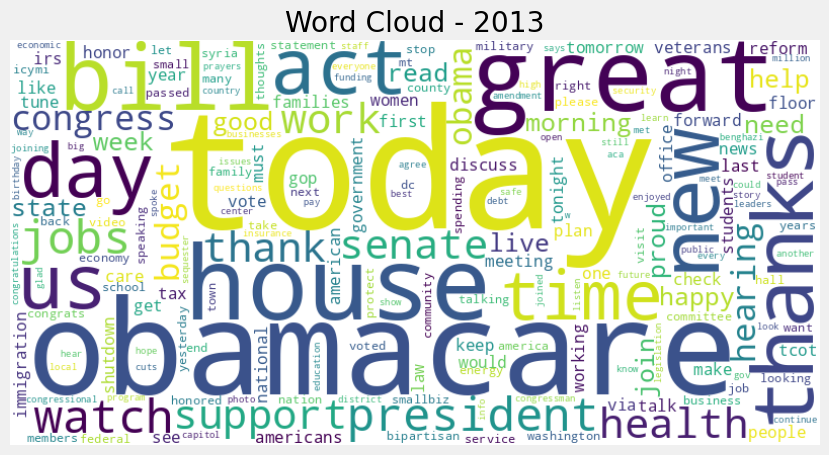

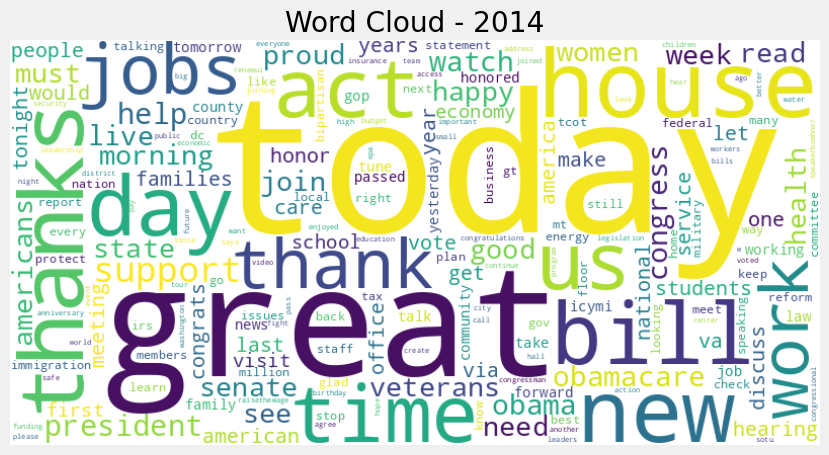

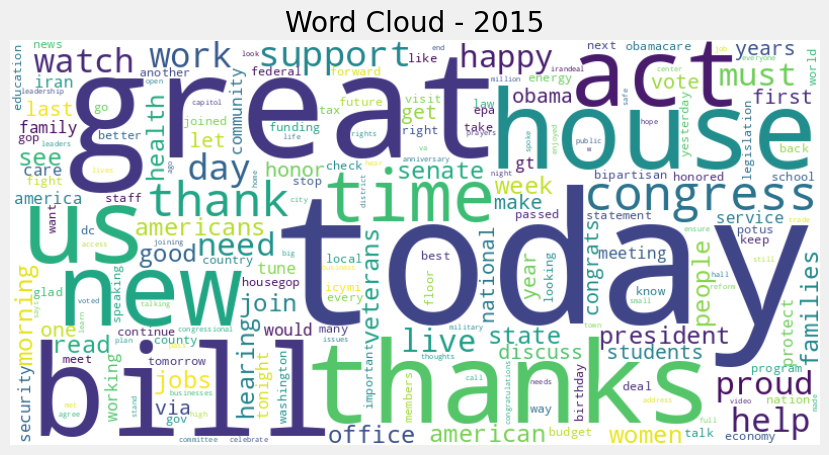

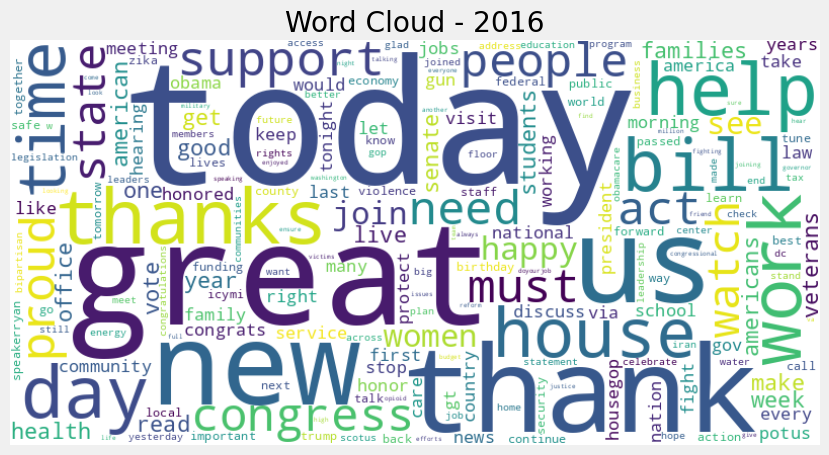

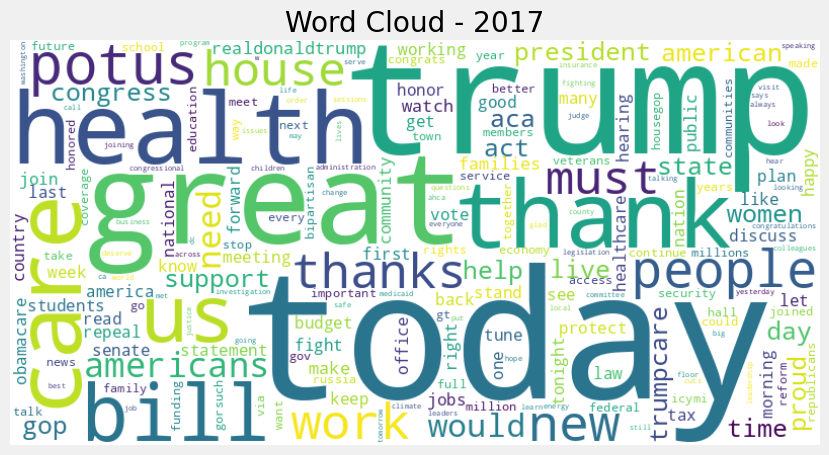

In [83]:
for year, group in group_tweets:
    # Combine all the text for the year into a single string
    text = ' '.join(group['text'])
    
    # Tokenize text
    tokens = word_tokenize(text)
    tokens = [token.lower() for token in tokens]
    tokens = [token for token in tokens if token.isalpha()]
    
    # # Tokenize the text to get individual words
    # words = word_tokenize(text)

    # Remove stop words and chosen words
    stop_words = set(stopwords.words('english'))
    chosen_words = set(["http", "https", "rt", "amp"])
    
    # Filter out words
    tokens = [token for token in tokens if token not in stop_words and token not in chosen_words]
    
    # Count the frequency of each word
    freq_dist = FreqDist(tokens)
    
    # Create a word cloud for the year
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dist)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Most Frequent Words - {year}", color='black')
    plt.axis('off')
    plt.show()

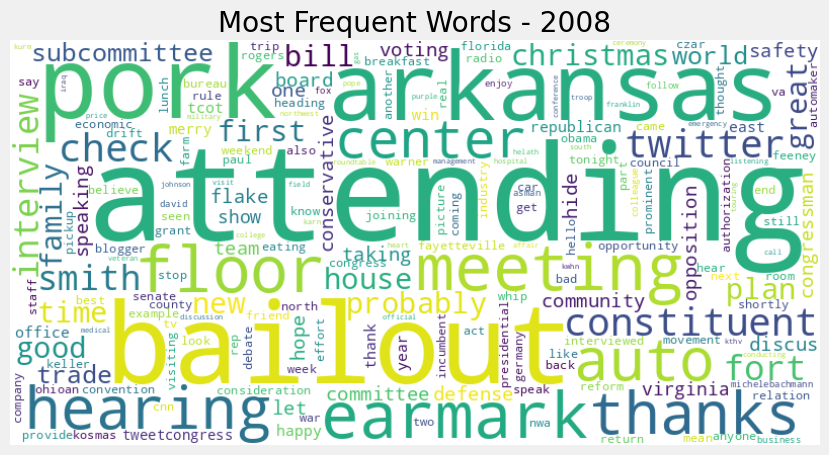

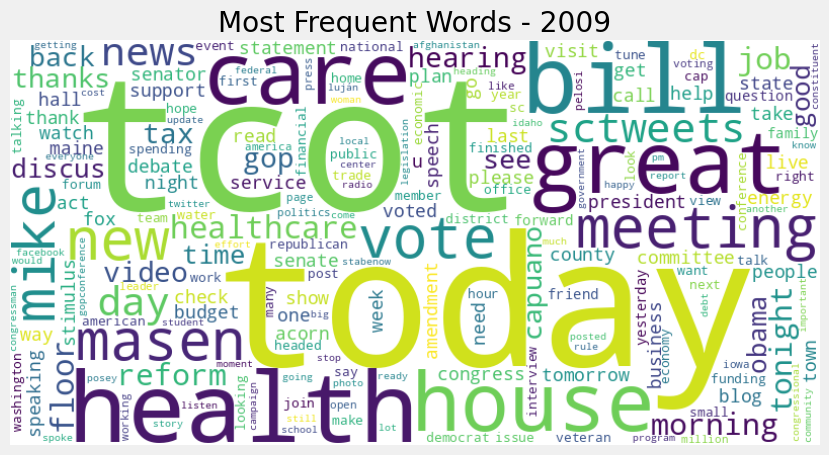

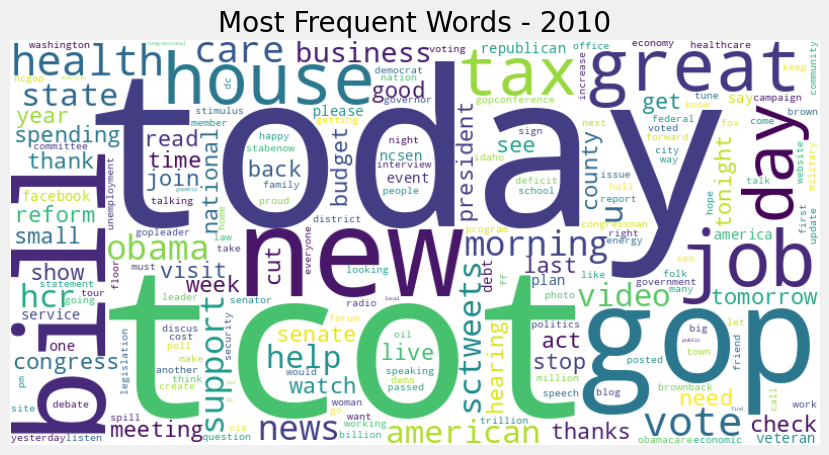

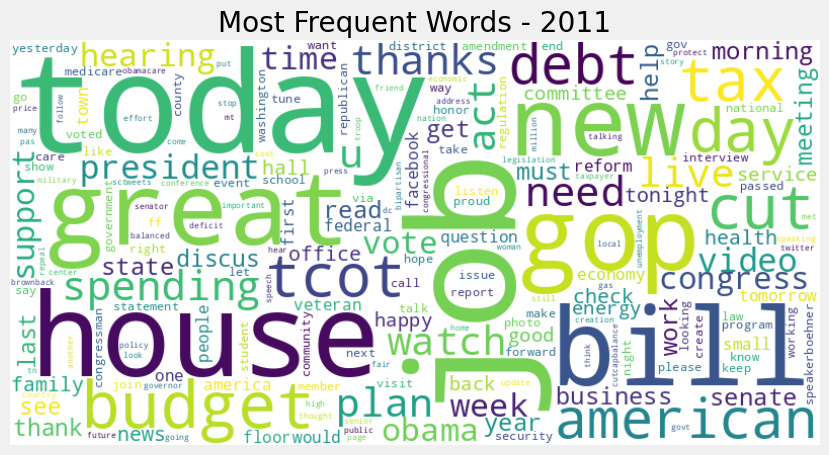

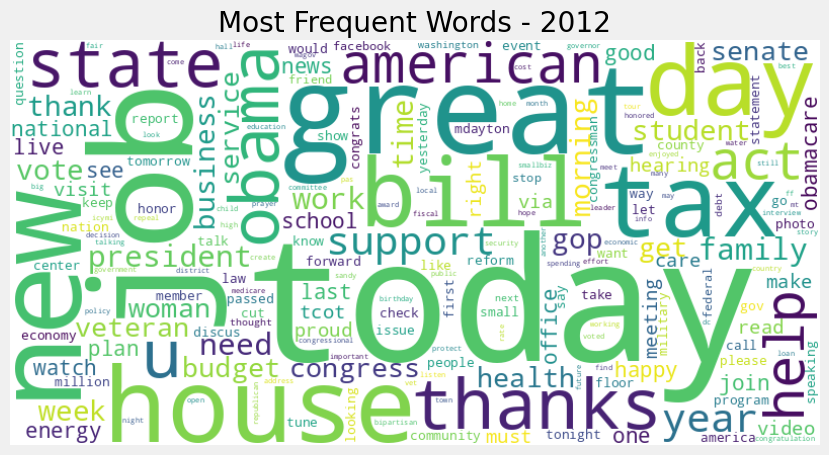

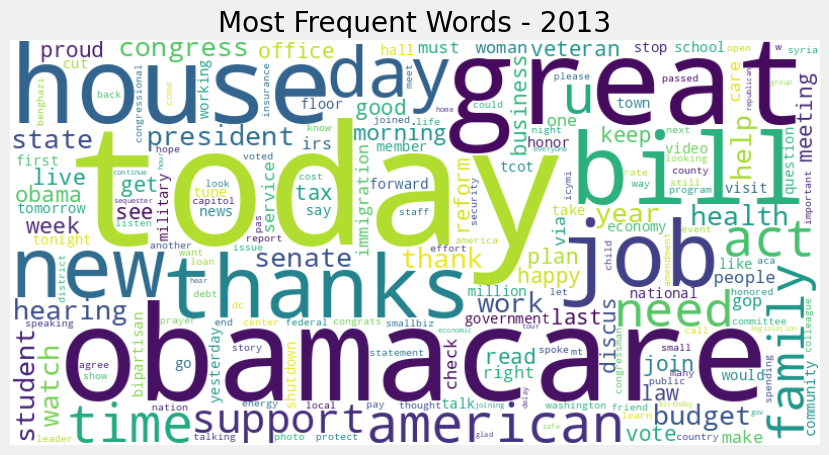

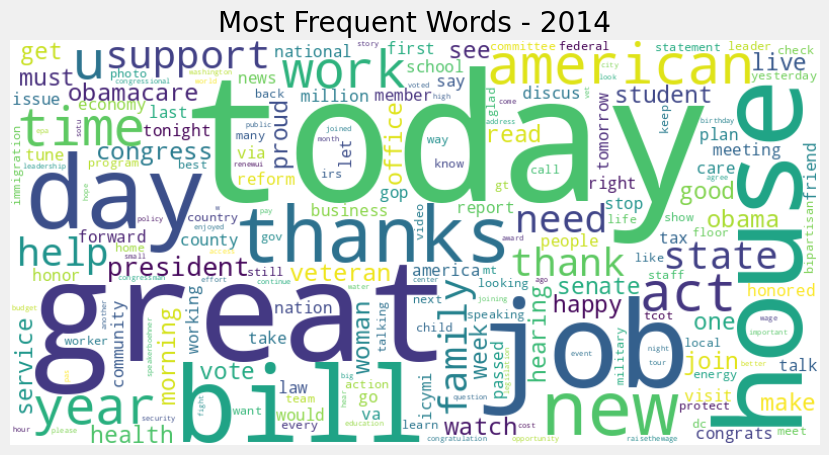

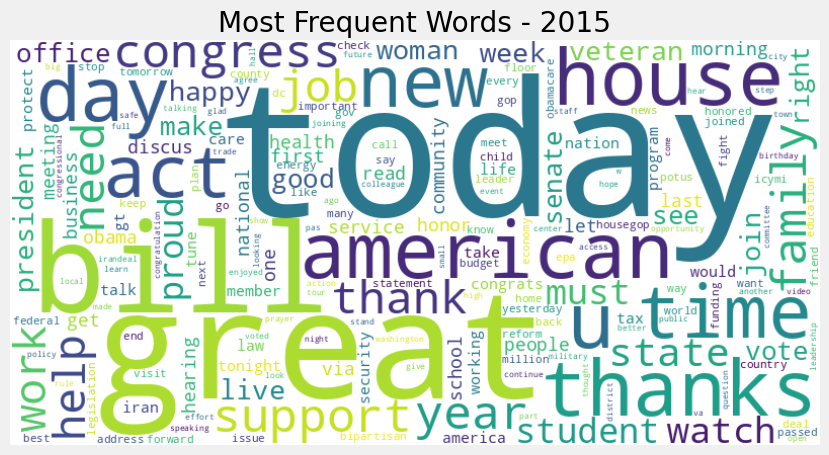

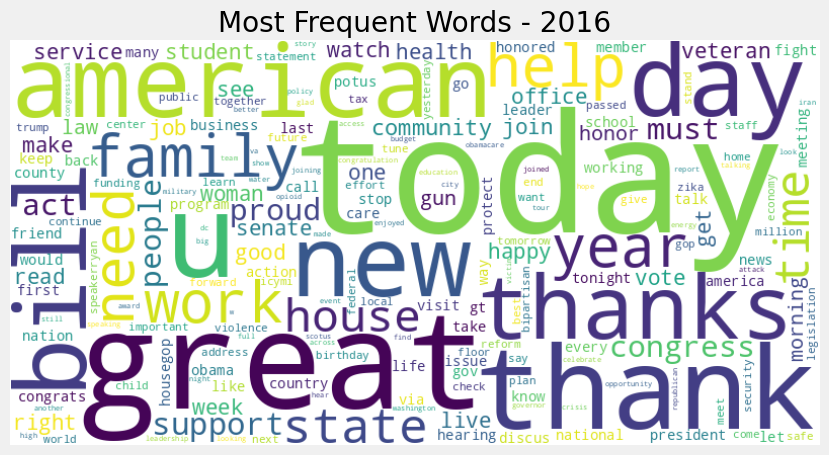

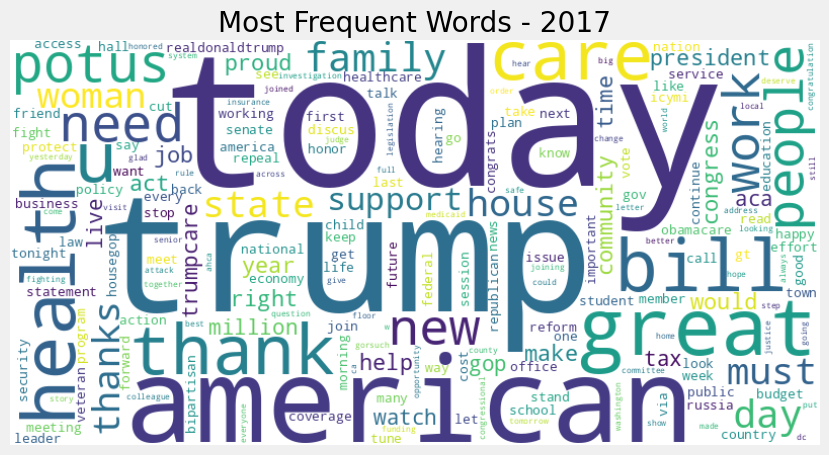

In [87]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have a connection object 'conn' to the SQLite database
# Fetch data from the database
twt_text_year = pd.read_sql_query('SELECT text, created_at FROM tweets', conn)

# Step 2: Convert 'created_at' to datetime type
twt_text_year['created_at'] = pd.to_datetime(twt_text_year['created_at'])

# Step 3: Group the tweets by year
group_tweets = twt_text_year.groupby(twt_text_year['created_at'].dt.year)

# Custom list of stop words specific to your data
stop_words = set(stopwords.words('english'))
custom_stop_words = set(["http", "https", "rt", "amp"])

# Initialize WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

for year, group in group_tweets:
    # Combine all the text for the year into a single string
    text = ' '.join(group['text'])
    
    # Tokenize text
    tokens = word_tokenize(text)
    tokens = [token.lower() for token in tokens]
    tokens = [token for token in tokens if token.isalpha()]
    
    # Remove custom stop words
    tokens = [token for token in tokens if token not in stop_words and token not in custom_stop_words]
    
    # Lemmatize tokens
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Count the frequency of each word
    freq_dist = FreqDist(tokens)
    
    # Create a word cloud for the year
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dist)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Most Frequent Words - {year}", color='black')
    plt.axis('off')
    plt.show()


In [17]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/lfigil/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [18]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [42]:
cursor.execute('SELECT id, text FROM tweets')
tweet_data = cursor.fetchall()

In [52]:
tweet_data[41][0]

990379102

In [54]:
res = {}
for i in tqdm(range(len(tweet_data))):
    text = tweet_data[i][1]
    id = tweet_data[i][0]
    res[id] = sia.polarity_scores(text)

  0%|          | 0/1243370 [00:00<?, ?it/s]

In [69]:
import pandas as pd
tweets_score = pd.DataFrame(res).T

neg    neu    pos  compound
877418565           0.000  1.000  0.000    0.0000
879618172           0.000  1.000  0.000    0.0000
879695803           0.000  1.000  0.000    0.0000
880393665           0.000  1.000  0.000    0.0000
880474266           0.000  1.000  0.000    0.0000
...                   ...    ...    ...       ...
872139777444917249  0.262  0.738  0.000   -0.7506
872139786378780677  0.080  0.920  0.000   -0.2732
872139844717338624  0.104  0.803  0.093   -0.0571
872140013416443906  0.000  0.734  0.266    0.7003
872140026737336320  0.185  0.815  0.000   -0.5267

[1243370 rows x 4 columns]

In [72]:
tweets_score = tweets_score.reset_index().rename(columns={'index': 'tweet_id'})

In [73]:
tweets_score

tweet_id    neg    neu    pos  compound
0                 877418565  0.000  1.000  0.000    0.0000
1                 879618172  0.000  1.000  0.000    0.0000
2                 879695803  0.000  1.000  0.000    0.0000
3                 880393665  0.000  1.000  0.000    0.0000
4                 880474266  0.000  1.000  0.000    0.0000
...                     ...    ...    ...    ...       ...
1243365  872139777444917249  0.262  0.738  0.000   -0.7506
1243366  872139786378780677  0.080  0.920  0.000   -0.2732
1243367  872139844717338624  0.104  0.803  0.093   -0.0571
1243368  872140013416443906  0.000  0.734  0.266    0.7003
1243369  872140026737336320  0.185  0.815  0.000   -0.5267

[1243370 rows x 5 columns]

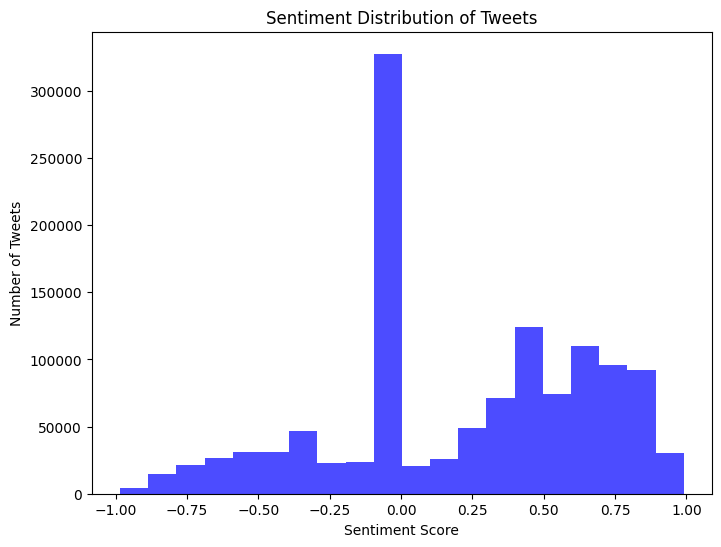

In [74]:
import matplotlib.pyplot as plt

# Plot the sentiment distribution as a histogram
plt.figure(figsize=(8, 6))
plt.hist(tweets_score['compound'], bins=20, color='blue', alpha=0.7)

# Add labels and title
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Tweets')
plt.title('Sentiment Distribution of Tweets')

# Show the plot
plt.show()


In [75]:
# Check tweets with less than -0.05 compound score

filtered_scores = tweets_score[tweets_score['compound'] < -0.05]

In [80]:
filtered_tweet_ids = filtered_scores['tweet_id']

In [86]:
filtered_tweet_ids

8                   894551506
13                  915393190
20                  930546663
21                  931746104
22                  931747655
                  ...        
1243359    872138783751385088
1243365    872139777444917249
1243366    872139786378780677
1243367    872139844717338624
1243369    872140026737336320
Name: tweet_id, Length: 231244, dtype: int64

In [84]:
cursor.execute(f"""SELECT id, text FROM tweets 
                WHERE id IN ({','.join(map(str, filtered_tweet_ids))})""")

neg_tweets = cursor.fetchall()

In [85]:
neg_tweets

[(894551506,
  'Meeting with Emergency Management officials from Johnson, Pope and Franklin counties'),
 (915393190,
  'Attending a Foreign Relations Committee Hearing on US-Russia Relations in the Aftermath of the Georgia Crisis'),
 (930546663,
  "I'd tell you to hide your wallet, but it's probably too late. This will likely be a very bad week. Will keep you updated as the slog goes on"),
 (931746104,
  "Will be heading the the conservative bloggers briefing today to discuss porkparade.com and the 'Bailout Congress' #pork"),
 (931747655,
  "I'm speaking on the floor shortly to in opposition to an effort to hide earmarks in the defense authorization bill."),
 (931748572,
  "I'm speaking on the floor shortly to in opposition to an effort to hide earmarks in the defense authorization bill #pork"),
 (939306050, "I'm speaking on House floor soon opposing bailout. #pork"),
 (939506857,
  "[staff] Congressman Flake's speech on the floor urging opposition to the bailout: http://tinyurl.com/4b

In [87]:
# Check tweets with positive sentiment score > 0.05
filtered_scores = tweets_score[tweets_score['compound'] > -0.05]
filtered_tweet_ids = filtered_scores['tweet_id']

cursor.execute(f"""SELECT id, text FROM tweets 
                WHERE id IN ({','.join(map(str, filtered_tweet_ids))})""")

pos_tweets = cursor.fetchall()

In [88]:
pos_tweets

[(877418565,
  'On a conference call about a weekend trip to Iraq to visit Arkansas troops'),
 (879618172, 'Being interviewed by KTHV'),
 (879695803,
  'Being interviewed by KARN on his Arkansas World Trade Center trip'),
 (880393665, "On KWHN in Fort Smith, that's 1320 AM"),
 (880474266,
  'Attending a Military of the Purple Heart Ceremony at the VA Medical Center in Fayetteville'),
 (880676101, 'Touring Helath South Hospital in Fayetteville'),
 (891075719,
  'conducting a veterans affairs economic opportunity subcommittee field hearing at the northwest arkansas community college'),
 (893175219, 'doing an interview on kurm radio'),
 (901977122,
  'Listening to constituents at a roundtable discussion about gas prices in Flippin'),
 (907605767, 'attending the GOP convention'),
 (909761002,
  'Joining the Twitter conversation at #rnc08. Trying to link up the blackberry for tonight. Live from St. Paul.'),
 (915252924,
  'Attending a Transportation and Infrastructure Committee Hearing on H

### Sentiment using ROBERTA

In [3]:
pip install transformers

  Using cached transformers-4.31.0-py3-none-any.whl (7.4 MB)
  Using cached tokenizers-0.13.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (7.8 MB)
  Using cached safetensors-0.3.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.3 MB)
  Using cached huggingface_hub-0.16.4-py3-none-any.whl (268 kB)
  Using cached regex-2023.6.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (770 kB)
  Using cached fsspec-2023.6.0-py3-none-any.whl (163 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tensorflow==2.12.

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 5.7 MB/s eta 0:00:00m eta 0:00:010:00:05
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 361.6 kB/s eta 0:00:001m421.1 kB/s eta 0:00:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 KB 2.3 MB/s eta 0:00:003.2 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 708.2 kB/s eta 0:00:00m eta 0:00:010:02:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 2.3 MB/s eta 0:00:00m eta 0:00:010:00:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 KB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 32.0 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 3.6 MB/s eta 0:00:00m eta 0:00:010:00:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 KB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7

In [5]:
pip install scipy


  Using cached scipy-1.11.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (36.3 MB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [92]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
# Define the GPU device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
             

In [6]:
import sqlite3

conn = sqlite3.connect('congress_tweets.db')
cursor = conn.cursor()

# Get tweet text
cursor.execute('SELECT text FROM tweets')
tweets_text = cursor.fetchall()

In [24]:
encoded_text = tokenizer(tweets_text[0][0], return_tensors='pt')
output = model(**encoded_text)
scores = output = output[0][0].detach().numpy()
scores = softmax(scores)

scores_dict = {
    'roberta_neg': scores[0],
    'roberta_neu': scores[1],
    'roberta_pos': scores[2]
}

print(scores_dict)

{'roberta_neg': 0.03328624, 'roberta_neu': 0.9341578, 'roberta_pos': 0.032555997}


In [23]:
sia.polarity_scores(tweets_text[0][0])

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [25]:
# Get tweet text
cursor.execute('SELECT id, text FROM tweets')
tweet_data = cursor.fetchall()

In [101]:
def polarity_scores_roberta(text):
    # Tokenize the text using the tokenizer
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)
    inputs = inputs.to(device)

    with torch.no_grad():
        outputs = model(**inputs)

    # Get the predicted sentiment label and score
    sentiment_scores = torch.softmax(outputs.logits[0], dim=0)

    scores_dict = {
        'roberta_neg': sentiment_scores[0].item(),
        'roberta_neu': sentiment_scores[1].item(),
        'roberta_pos': sentiment_scores[2].item()
    }

    return scores_dict


In [102]:
polarity_scores_roberta(tweet_data[0][1])

{'roberta_neg': 0.033286165446043015,
 'roberta_neu': 0.9341577887535095,
 'roberta_pos': 0.032555997371673584}

In [103]:
res = {}
for i in tqdm(range(len(tweet_data))):
    try:
        text = tweet_data[i][1]
        id = tweet_data[i][0]
        # vader_result = sia.polarity_scores(text)
        # vader_result_rename = {}
        # for key, value in vader_result.items():
        #     vader_result_rename[f"vader_{key}"] = value
        
        # roberta_result = polarity_scores_roberta(text)
        
        # both = {**vader_result_rename, **roberta_result}# Your input text (replace this with your actual text)
        res[id] = polarity_scores_roberta(text)
        if i == 100:
            print(torch.cuda.memory_summary(device=None, abbreviated=False))

    except RuntimeError:
        print(f"Broke for id {id}")

    

  0%|          | 0/1243370 [00:00<?, ?it/s]

|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      | 496503 KiB | 498488 KiB |   9623 MiB |   9139 MiB |
|       from large pool | 496000 KiB | 496000 KiB |    484 MiB |      0 MiB |
|       from small pool |    503 KiB |   2488 KiB |   9139 MiB |   9139 MiB |
|---------------------------------------------------------------------------|
| Active memory         | 496503 KiB | 498488 KiB |   9623 MiB |   9139 MiB |
|       from large pool | 496000 KiB | 496000 KiB |    484 MiB |

KeyboardInterrupt: 

In [91]:
torch.cuda.is_available()

True

In [111]:
# Import required libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import udf
from pyspark.sql.types import MapType, StringType, FloatType

import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Create a SparkSession
spark = SparkSession.builder.appName("RoBERTa Sentiment Analysis").getOrCreate()

# Define the model and tokenizer
MODEL = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

# Define the GPU device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define the function to be applied using udf
def get_sentiment_scores(text):
    # Tokenize the text using the tokenizer
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)
    inputs = inputs.to(device)

    with torch.no_grad():
        outputs = model(**inputs)

    # Get the predicted sentiment label and score
    sentiment_scores = torch.softmax(outputs.logits[0], dim=0)

    scores_dict = {
        'roberta_neg': sentiment_scores[0].item(),
        'roberta_neu': sentiment_scores[1].item(),
        'roberta_pos': sentiment_scores[2].item()
    }

    return scores_dict

# Register the function as a Spark UDF
sentiment_udf = udf(get_sentiment_scores, MapType(StringType(), FloatType()))

# Read data from a CSV file using PySpark DataFrame
csv_file_path = "tweets_text"
df_spark = spark.read.csv(csv_file_path, header=True, inferSchema=True)

# Apply the udf to the 'text' column and create new columns for sentiment scores
df_spark = df_spark.withColumn("sentiment_scores", sentiment_udf("text"))

# Show the result
df_spark.show(truncate=False)

# # Stop the SparkSession
# spark.stop()


+---------+------------------------------------------------------------------------------------------------------------------------------------------+-----------------------------------------------------------------------------------+
|id       |text                                                                                                                                      |sentiment_scores                                                                   |
+---------+------------------------------------------------------------------------------------------------------------------------------------------+-----------------------------------------------------------------------------------+
|877418565|On a conference call about a weekend trip to Iraq to visit Arkansas troops                                                                |{roberta_pos -> 0.032555997, roberta_neu -> 0.9341578, roberta_neg -> 0.033286165} |
|879618172|Being interviewed by KTHV                        

In [116]:
df_spark.select("sentiment_scores").show(truncate=False)

+-----------------------------------------------------------------------------------+
|sentiment_scores                                                                   |
+-----------------------------------------------------------------------------------+
|{roberta_pos -> 0.032555997, roberta_neu -> 0.9341578, roberta_neg -> 0.033286165} |
|{roberta_pos -> 0.045294344, roberta_neu -> 0.91032535, roberta_neg -> 0.044380356}|
|{roberta_pos -> 0.036817495, roberta_neu -> 0.9348457, roberta_neg -> 0.028336843} |
|{roberta_pos -> 0.056594763, roberta_neu -> 0.9325922, roberta_neg -> 0.010812998} |
|{roberta_pos -> 0.089935236, roberta_neu -> 0.8987353, roberta_neg -> 0.011329528} |
|{roberta_pos -> 0.03451046, roberta_neu -> 0.94484925, roberta_neg -> 0.020640258} |
|{roberta_pos -> 0.03116228, roberta_neu -> 0.9466527, roberta_neg -> 0.022185015}  |
|{roberta_pos -> 0.055133484, roberta_neu -> 0.9142142, roberta_neg -> 0.03065236}  |
|{roberta_pos -> 0.03292012, roberta_neu -> 0.92712086

In [118]:
# Import required libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import udf
from pyspark.sql.types import MapType, StringType, FloatType

import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Create a SparkSession
spark = SparkSession.builder.appName("RoBERTa Sentiment Analysis").getOrCreate()

# Define the model and tokenizer
MODEL = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

# Define the function to be applied using udf
def get_sentiment_scores(text):
    # Tokenize the text using the tokenizer
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)

    with torch.no_grad():
        outputs = model(**inputs)

    # Get the predicted sentiment label and score
    sentiment_scores = torch.softmax(outputs.logits[0], dim=0)

    scores_dict = {
        'roberta_neg': sentiment_scores[0].item(),
        'roberta_neu': sentiment_scores[1].item(),
        'roberta_pos': sentiment_scores[2].item()
    }

    return scores_dict

# Register the function as a Spark UDF
sentiment_udf = udf(get_sentiment_scores, MapType(StringType(), FloatType()))

# Read data from a CSV file using PySpark DataFrame
csv_file_path = "tweets_text"
df_spark = spark.read.csv(csv_file_path, header=True, inferSchema=True)

# Apply the udf to the 'text' column and create new columns for sentiment scores
df_spark = df_spark.withColumn("sentiment_scores", sentiment_udf("text"))

# Show the result, displaying only the 'sentiment_scores' column
df_spark.select("sentiment_scores").show(truncate=False)

# Stop the SparkSession
spark.stop()


+-----------------------------------------------------------------------------------+
|sentiment_scores                                                                   |
+-----------------------------------------------------------------------------------+
|{roberta_pos -> 0.032555997, roberta_neu -> 0.9341578, roberta_neg -> 0.03328624}  |
|{roberta_pos -> 0.04529435, roberta_neu -> 0.91032517, roberta_neg -> 0.04438042}  |
|{roberta_pos -> 0.036817506, roberta_neu -> 0.9348456, roberta_neg -> 0.028336894} |
|{roberta_pos -> 0.05659479, roberta_neu -> 0.9325922, roberta_neg -> 0.010813019}  |
|{roberta_pos -> 0.08993529, roberta_neu -> 0.89873517, roberta_neg -> 0.011329536} |
|{roberta_pos -> 0.034510456, roberta_neu -> 0.9448494, roberta_neg -> 0.020640222} |
|{roberta_pos -> 0.031162266, roberta_neu -> 0.9466527, roberta_neg -> 0.022185015} |
|{roberta_pos -> 0.055133473, roberta_neu -> 0.91421425, roberta_neg -> 0.030652316}|
|{roberta_pos -> 0.0329201, roberta_neu -> 0.92712086,